In [83]:
import numpy as np
import pandas as pd

In [84]:
df = pd.read_csv("/content/zameen-updated.csv")

In [85]:
df.head(5)

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Area Type      168446 non-nul

In [87]:
df.describe()

,property_id,location_id,price,latitude,longitude,baths,bedrooms,Area Size
count,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000
mean,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,5.892188
std,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,5.778327
min,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000
25%,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,3.000000
50%,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,5.000000
75%,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,8.000000
max,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,800.000000


**Price:**  

*   The mean price is 17.77 million, but the max is 2 billion. This large discrepancy, along with the standard deviation of 35.31 million, suggests that there are extremely high-priced properties compared to the average, likely outliers.
*   The 25th percentile is 175,000 and the 75th percentile is 19.5 million, which means that most properties fall within this range. Anything far above 19.5 million could be an outlier.



 **Bedrooms:**
The mean is 3.18, and the 75th percentile is 4, but the max is 68 bedrooms. This suggests a few properties with an unusually large number of bedrooms, making them potential outliers.

**Bathrooms (baths):**
The mean is 2.87, and the 75th percentile is 4, but the max is 403. This indicates there are properties with an unusually high number of bathrooms, which are very likely outliers.

In [88]:
df = df.drop(['property_id','location_id', 'page_url','area', 'Area Category'], axis=1)

In [89]:
df.head()

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0
1,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6
2,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0
3,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0
4,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0


In [90]:
df.isnull().sum()

,0
property_type,0
price,0
location,0
city,0
province_name,0
latitude,0
longitude,0
baths,0
purpose,0
bedrooms,0


In [91]:
total_null_values = df.isnull().sum().sum()
print(total_null_values)


88143


In [92]:
total_values=df.index.stop
null_values=df['agency'].isnull().sum()

percentage=null_values/total_values
print(percentage)

0.2616328081402942


In [93]:
agency_unique = df['agency'].unique()
list(agency_unique)

[nan,
 'Easy Property',
 'Ettemad Enterprises',
 'Crown Associate',
 'Al Sahar Estate',
 'Infinity Properties',
 'Paris Real Estate & Builders',
 'Property Syendicate',
 'Zorje Pvt Ltd',
 'Nexus Estate Services',
 'Real Biz International',
 'Khan Estate',
 'Shahum Estate 2',
 'MATZ Services',
 'Sukhera Estate & Builders',
 'Hamza Real Estate',
 'Rana Estate',
 'Punjab Associates',
 'Forces Properties',
 'Punjaab Estates',
 'Valo Marketing',
 'Ibraheem Associates',
 'Al-Ghous Real Estate Management & Construction',
 'Mughal Estate & Builders',
 'Musa Enterprises',
 'Premier Properties',
 'Well Known Properties',
 'Karachi Real Estate Investment Trust',
 'Universal Estate & Builders',
 'Property Master',
 'United Real Estate',
 'Memon Real Estate',
 'Vigilant Property Solutions',
 'Patel Builders',
 'Estate 1. com',
 'Guide Line Real Estate',
 'Khatwani Estate',
 'Entrepreneur Real Estate',
 'Shah Zain Associates',
 'Property Panel',
 'Al Karam Property',
 'National Property Advisor',
 '

In [94]:
agent_unique = df['agent'].unique()
list(agent_unique)

[nan,
 'Muhammad Junaid Ceo Muhammad Shahid Director',
 'Balqiaz Marwat',
 'Abrar Ahmed',
 'Zahid H. Usmani',
 'Ettemad',
 'Ali',
 'Chaudhary Naveed',
 'Rizwan Shafqat',
 'Obaid Abbasi',
 'Ch Afzal/ Ch Faisal/ Ch Adeel',
 'Usama Khan',
 'mohsinkhan and B',
 'Babar Hameed, Raja Omar',
 'Group Captain (R) Tajammul Baig',
 'Ahmed Sheraz Sukhera',
 'Imran Shahad',
 'Rana Shahzad',
 'Ch. Tariq Ali Ranjha',
 'Khalid Saeed Khan',
 'Irfan Rehman Khan',
 'Nabeel Khalid Ch M Naveed Muhammad Bin Shahid',
 'Miss Noor ul Huda',
 'Muhammad Nasir',
 'Mughal',
 'Muhammad Junaid CEO  Muhammad Shahid Director',
 'Muhammad Junaid CEO    Muhammad Shahid Director',
 'Adil Yousaf',
 'Aamir Motiwala',
 'Zeeshan Ahmed',
 'Feroz',
 'Syed Zakir Ali',
 'M. Tahir',
 'G Sarwar Gondal',
 'Ghulam Sarwar Gondal',
 'Muhammad Aqdas Kamdar',
 'FahadGhulam Sarwar Gondal',
 'Group Captain Rana Farooq (R), Kashif Khan',
 'Group Captain Rana Farooq R Kashif Khan',
 'Muhammad Waqar',
 'Zikru Ur Rehman',
 'Kaleem Zafar Raja',

We can fill these null values with 'Self' word because they all do their work by their own.

In [95]:

df['agency'].fillna('Self', inplace=True)
df['agent'].fillna('Self', inplace=True)


In [96]:
df.isnull().sum()

,0
property_type,0
price,0
location,0
city,0
province_name,0
latitude,0
longitude,0
baths,0
purpose,0
bedrooms,0


In [97]:
df1=df.copy()

In [98]:
df1.duplicated().sum()

15016

In [99]:
df1.drop_duplicates(inplace=True)

In [100]:
df1.duplicated().sum()

0

In [101]:
df1.shape

(153430, 15)

In [102]:
df1.head()

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,02-04-2019,Self,Self,Marla,4.0
1,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,05-04-2019,Self,Self,Marla,5.6
2,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,07-17-2019,Self,Self,Marla,8.0
3,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,04-05-2019,Self,Self,Kanal,2.0
4,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0


In [103]:
df1['property_type'].unique()

array(['Flat', 'House', 'Penthouse', 'Farm House', 'Lower Portion',
       'Upper Portion', 'Room'], dtype=object)

In [104]:
df1['property_type'] = df1['property_type'].str.replace(' ', '')
df1['property_type'] = df1['property_type'].str.lower()
df1['property_type'].unique()

array(['flat', 'house', 'penthouse', 'farmhouse', 'lowerportion',
       'upperportion', 'room'], dtype=object)

In [105]:
df1['price'].unique()

array([10000000,  6900000, 16500000, ...,  9010000,  1247000,   421000])

In [106]:
len(df1['location'].unique())

1509

In [107]:
df1['city'].unique()

array(['Islamabad', 'Lahore', 'Faisalabad', 'Rawalpindi', 'Karachi'],
      dtype=object)

In [108]:
# prompt: city column in lower case

df1['city'] = df1['city'].str.lower()


In [109]:
df1['province_name'].unique()

array(['Islamabad Capital', 'Punjab', 'Sindh'], dtype=object)

In [110]:
df1['Area Size'].unique()

array([4.000e+00, 5.600e+00, 8.000e+00, 2.000e+00, 1.600e+00, 1.000e+00,
       6.200e+00, 7.100e+00, 7.800e+00, 4.500e+00, 1.000e+01, 3.100e+00,
       1.500e+00, 1.400e+01, 5.000e+00, 6.000e+00, 8.400e+00, 4.700e+00,
       1.200e+01, 4.300e+00, 1.780e+01, 6.700e+00, 5.300e+00, 2.100e+00,
       2.500e+00, 1.200e+00, 1.330e+01, 2.400e+00, 1.600e+01, 9.300e+00,
       9.000e+00, 1.100e+01, 7.500e+00, 1.800e+01, 3.000e+00, 6.500e+00,
       1.100e+00, 9.700e+00, 7.000e+00, 3.800e+00, 5.500e+00, 4.400e+00,
       2.200e+00, 8.900e+00, 3.200e+00, 9.600e+00, 9.800e+00, 1.020e+01,
       1.140e+01, 1.310e+01, 4.800e+00, 7.600e+00, 5.400e+00, 1.340e+01,
       1.320e+01, 5.200e+00, 1.300e+00, 6.100e+00, 9.100e+00, 1.150e+01,
       1.090e+01, 3.700e+00, 4.200e+00, 5.800e+00, 1.010e+01, 1.700e+01,
       8.200e+00, 1.170e+01, 1.070e+01, 1.060e+01, 1.120e+01, 1.700e+00,
       6.900e+00, 6.600e+00, 2.900e+00, 1.110e+01, 3.600e+00, 4.100e+00,
       1.640e+01, 1.500e+01, 1.300e+01, 1.400e+00, 

In [111]:
df1['baths'].unique()

array([  2,   3,   6,   4,   8,   7,   5,   0,   1,  10,   9,  11,  13,
        12, 403,  14])

In [112]:
df1[df1.baths>20]

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size
129605,house,15000000,Khayaban-e-Sir Syed,rawalpindi,Punjab,33.638847,73.048089,403,For Sale,6,07-04-2019,Al-Rehman Estate & Developers,Raja Ahsan Rehman H,Marla,5.0


In [113]:
df1 = df1.drop(129605)

In [114]:
df1[df1.baths>20]

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size


In [115]:
df1.head()

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size
0,flat,10000000,G-10,islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,02-04-2019,Self,Self,Marla,4.0
1,flat,6900000,E-11,islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,05-04-2019,Self,Self,Marla,5.6
2,house,16500000,G-15,islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,07-17-2019,Self,Self,Marla,8.0
3,house,43500000,Bani Gala,islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,04-05-2019,Self,Self,Kanal,2.0
4,house,7000000,DHA Defence,islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0


In [116]:
df1['purpose'].unique()

array(['For Sale', 'For Rent'], dtype=object)

In [117]:
df1['purpose'] = df1['purpose'].str.lower()
df1['purpose'] = df1['purpose'].str.replace('for ', '')

In [118]:
df1.head()

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size
0,flat,10000000,G-10,islamabad,Islamabad Capital,33.679890,73.012640,2,sale,2,02-04-2019,Self,Self,Marla,4.0
1,flat,6900000,E-11,islamabad,Islamabad Capital,33.700993,72.971492,3,sale,3,05-04-2019,Self,Self,Marla,5.6
2,house,16500000,G-15,islamabad,Islamabad Capital,33.631486,72.926559,6,sale,5,07-17-2019,Self,Self,Marla,8.0
3,house,43500000,Bani Gala,islamabad,Islamabad Capital,33.707573,73.151199,4,sale,4,04-05-2019,Self,Self,Kanal,2.0
4,house,7000000,DHA Defence,islamabad,Islamabad Capital,33.492591,73.301339,3,sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0


In [119]:
df1['bedrooms'].unique()

array([ 2,  3,  5,  4,  8,  7,  0,  1,  6, 10, 12,  9, 11, 14, 15, 16, 13,
       18, 28, 25, 21, 68, 27])

In [120]:
df1[df1.bedrooms>20]

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size
120075,house,1300000,Satellite Town,rawalpindi,Punjab,33.642965,73.068416,0,rent,28,07-02-2019,Tariq Property,Tariq Razzaq,Kanal,2.0
129557,house,960000000,Gulberg,lahore,Punjab,31.505678,74.348202,0,sale,25,07-04-2019,Al Meezan Estate,Tariq Mehmood,Kanal,8.0
130132,house,300000,G-14,islamabad,Islamabad Capital,33.641955,72.952859,0,rent,21,07-04-2019,Self,Self,Kanal,1.2
139738,house,1300000,Satellite Town,rawalpindi,Punjab,33.642965,73.068416,0,rent,28,07-10-2019,Tariq Property,Tariq Razzaq,Kanal,2.0
140891,house,2500000,North Nazimabad,karachi,Sindh,24.925361,67.039089,0,rent,68,07-09-2019,Zahid Corporation,Riaz Ahmed,Kanal,6.6
144418,house,550000,Jamshed Town,karachi,Sindh,24.864595,67.066126,0,rent,25,07-15-2019,Pak International Estate,Rais Qadri,Kanal,3.0
144837,house,80000000,Gulraiz Housing Scheme,rawalpindi,Punjab,33.562800,73.107144,0,sale,27,07-11-2019,Kohsar Real Estate,Raja Aqeel,Kanal,3.0
152009,house,900000,Gulshan-e-Iqbal Town,karachi,Sindh,24.927540,67.104406,0,rent,25,07-14-2019,Syed Associates,Amir,Kanal,3.0
164716,house,1300000,Satellite Town,rawalpindi,Punjab,33.642965,73.068416,0,rent,28,07-17-2019,Tariq Property,Tariq Razzaq,Kanal,2.0


In [121]:
index_to_drop = [120075, 129557, 130132, 139738, 140891, 144418, 144837, 152009, 164716]
df1 = df1.drop(index_to_drop)

In [122]:
df1[df1.bedrooms>20]

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size


In [123]:
df1['Area Type'].unique()

array(['Marla', 'Kanal'], dtype=object)

In [124]:
df1['Area Size'].unique()

array([4.000e+00, 5.600e+00, 8.000e+00, 2.000e+00, 1.600e+00, 1.000e+00,
       6.200e+00, 7.100e+00, 7.800e+00, 4.500e+00, 1.000e+01, 3.100e+00,
       1.500e+00, 1.400e+01, 5.000e+00, 6.000e+00, 8.400e+00, 4.700e+00,
       1.200e+01, 4.300e+00, 1.780e+01, 6.700e+00, 5.300e+00, 2.100e+00,
       2.500e+00, 1.200e+00, 1.330e+01, 2.400e+00, 1.600e+01, 9.300e+00,
       9.000e+00, 1.100e+01, 7.500e+00, 1.800e+01, 3.000e+00, 6.500e+00,
       1.100e+00, 9.700e+00, 7.000e+00, 3.800e+00, 5.500e+00, 4.400e+00,
       2.200e+00, 8.900e+00, 3.200e+00, 9.600e+00, 9.800e+00, 1.020e+01,
       1.140e+01, 1.310e+01, 4.800e+00, 7.600e+00, 5.400e+00, 1.340e+01,
       1.320e+01, 5.200e+00, 1.300e+00, 6.100e+00, 9.100e+00, 1.150e+01,
       1.090e+01, 3.700e+00, 4.200e+00, 5.800e+00, 1.010e+01, 1.700e+01,
       8.200e+00, 1.170e+01, 1.070e+01, 1.060e+01, 1.120e+01, 1.700e+00,
       6.900e+00, 6.600e+00, 2.900e+00, 1.110e+01, 3.600e+00, 4.100e+00,
       1.640e+01, 1.500e+01, 1.300e+01, 1.400e+00, 

In [125]:
df1['Area Size'] = df1['Area Size'].fillna(0).astype(int)
df1.head()

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size
0,flat,10000000,G-10,islamabad,Islamabad Capital,33.679890,73.012640,2,sale,2,02-04-2019,Self,Self,Marla,4
1,flat,6900000,E-11,islamabad,Islamabad Capital,33.700993,72.971492,3,sale,3,05-04-2019,Self,Self,Marla,5
2,house,16500000,G-15,islamabad,Islamabad Capital,33.631486,72.926559,6,sale,5,07-17-2019,Self,Self,Marla,8
3,house,43500000,Bani Gala,islamabad,Islamabad Capital,33.707573,73.151199,4,sale,4,04-05-2019,Self,Self,Kanal,2
4,house,7000000,DHA Defence,islamabad,Islamabad Capital,33.492591,73.301339,3,sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8


In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [127]:
fig=px.bar(df.groupby('city',as_index=False)['price'].mean().sort_values(by='price',ascending=False).head(10),
           x='city',y='price',color='city',labels={'city':'City Name','price':'Price'},
           template='plotly_dark',text='price',title='<b> Average Price by City')
fig.show()

In [128]:
fig=px.pie(df.groupby('property_type',as_index=False)['price'].mean().sort_values(by='price',ascending=False).head(10),
           names='property_type',values='price',color='property_type',
           labels={'property_type':'Property Type ','price':'Average Price'},template='plotly_dark',
           title='<b>Average price by Property type')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom', y=1.02,xanchor='right',x=1))

In [129]:
#Which city has more ad posting
px.funnel(df.groupby('city',as_index=False)['price'].count().sort_values(by='price',
                    ascending=False).head(15),y='city',x='price',
          color_discrete_sequence=['orange'],labels={'price':'count'},
          template='plotly_dark',title='<b> Which city has more ad posting')

Faislabad is less in this list with only 8133 ads while Karachi tops of the
list with 60.48k ads.

Lahore and Islamabad are near to each other with 41.427k and 37.426k respectively.

Rawalpindi posted 20.976k ads.



In [130]:
#Top 20 agency contributers
fig=px.bar(df.groupby('agency',as_index=False)['price'].count().sort_values(by='price',ascending=False).head(20)[1:22],
           x='agency',y='price',color='agency',labels={'agency':'agency Name','price':'Total contributions'},
           template='plotly_dark',text='price',title='<b> Top 20 agency Contributer')
fig.update_xaxes(tickangle=90)
fig.show()

In [131]:
df1.head()

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size
0,flat,10000000,G-10,islamabad,Islamabad Capital,33.679890,73.012640,2,sale,2,02-04-2019,Self,Self,Marla,4
1,flat,6900000,E-11,islamabad,Islamabad Capital,33.700993,72.971492,3,sale,3,05-04-2019,Self,Self,Marla,5
2,house,16500000,G-15,islamabad,Islamabad Capital,33.631486,72.926559,6,sale,5,07-17-2019,Self,Self,Marla,8
3,house,43500000,Bani Gala,islamabad,Islamabad Capital,33.707573,73.151199,4,sale,4,04-05-2019,Self,Self,Kanal,2
4,house,7000000,DHA Defence,islamabad,Islamabad Capital,33.492591,73.301339,3,sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8


In [132]:
area_in_marla=df1[['Area Type','Area Size']].apply(lambda x: x['Area Size']*20 if x['Area Type'] in ['Kanal'] else x, axis=1)
area_in_marla.drop(['Area Type'],axis=1,inplace=True)
area_in_marla.rename(columns={'Area Size':'Area_in_Marla'},inplace=True)
df1=pd.concat([df1,area_in_marla],axis=1)
df1.head(20)

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area_in_Marla
0,flat,10000000,G-10,islamabad,Islamabad Capital,33.679890,73.012640,2,sale,2,02-04-2019,Self,Self,Marla,4,4
1,flat,6900000,E-11,islamabad,Islamabad Capital,33.700993,72.971492,3,sale,3,05-04-2019,Self,Self,Marla,5,5
2,house,16500000,G-15,islamabad,Islamabad Capital,33.631486,72.926559,6,sale,5,07-17-2019,Self,Self,Marla,8,8
3,house,43500000,Bani Gala,islamabad,Islamabad Capital,33.707573,73.151199,4,sale,4,04-05-2019,Self,Self,Kanal,2,40
4,house,7000000,DHA Defence,islamabad,Islamabad Capital,33.492591,73.301339,3,sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8,8
5,house,34500000,Ghauri Town,islamabad,Islamabad Capital,33.623947,73.126588,8,sale,8,04-05-2019,Self,Self,Kanal,1,20
6,house,27000000,Korang Town,islamabad,Islamabad Capital,33.579034,73.139591,8,sale,8,01-04-2019,Self,Self,Kanal,1,20
7,flat,7800000,E-11,islamabad,Islamabad Capital,33.698244,72.984238,2,sale,2,05-05-2019,Ettemad Enterprises,Balqiaz Marwat,Marla,6,6
8,house,50000000,DHA Defence,islamabad,Islamabad Capital,33.540894,73.095732,7,sale,7,10-19-2018,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Kanal,1,20
9,penthouse,40000000,F-11,islamabad,Islamabad Capital,33.679211,72.988787,5,sale,5,06-27-2019,Crown Associate,Abrar Ahmed,Kanal,1,20


In [133]:
df2 = df1.copy()

In [134]:
df2.location = df2.location.apply(lambda x: x.strip())
location_stats = df2.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

,location
location,
DHA Defence,20932
Bahria Town Rawalpindi,7396
Bahria Town Karachi,7308
Bahria Town,5583
Gulistan-e-Jauhar,5148
...,...
Park View,1
Gawala Colony,1
Mohlanwal Scheme,1


In [135]:
len(location_stats[location_stats<=10])

841

In [136]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

,location
location,
Gul-e-Damin,10
E-14,10
Race Course,10
Britto Road,10
Shah Faisal Road,10
...,...
Park View,1
Gawala Colony,1
Mohlanwal Scheme,1


In [137]:
df2.location = df2.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df2.location.unique())

669

In [138]:
df2.head()

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area_in_Marla
0,flat,10000000,G-10,islamabad,Islamabad Capital,33.679890,73.012640,2,sale,2,02-04-2019,Self,Self,Marla,4,4
1,flat,6900000,E-11,islamabad,Islamabad Capital,33.700993,72.971492,3,sale,3,05-04-2019,Self,Self,Marla,5,5
2,house,16500000,G-15,islamabad,Islamabad Capital,33.631486,72.926559,6,sale,5,07-17-2019,Self,Self,Marla,8,8
3,house,43500000,Bani Gala,islamabad,Islamabad Capital,33.707573,73.151199,4,sale,4,04-05-2019,Self,Self,Kanal,2,40
4,house,7000000,DHA Defence,islamabad,Islamabad Capital,33.492591,73.301339,3,sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8,8


In [139]:
df2.price.describe()

,price
count,1.534200e+05
mean,1.841248e+07
std,3.616798e+07
min,0.000000e+00
25%,2.000000e+05
50%,8.700000e+06
75%,2.000000e+07
max,2.000000e+09


Outliers Detection

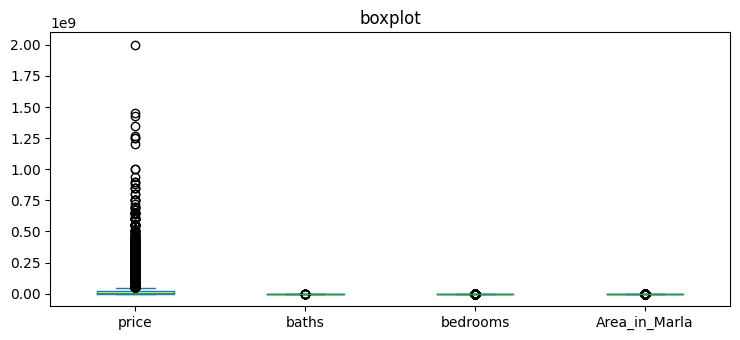

In [140]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

ax = df2[['price', 'baths', 'bedrooms', 'Area_in_Marla']].plot(kind='box', title='boxplot')
plt.show()

<ipython-input-141-78ee76ddf664>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: >

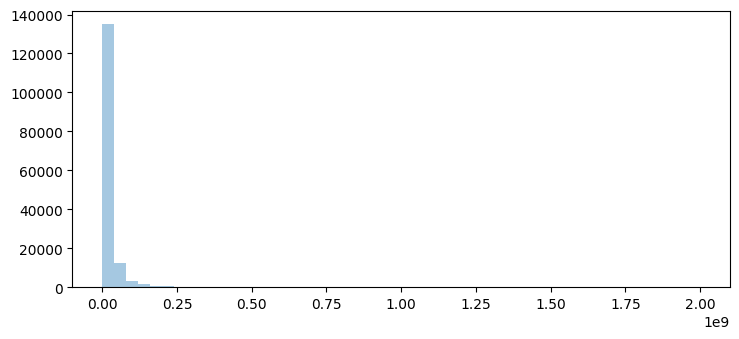

In [141]:
sns.distplot(x=df2['price'],kde=False)

In [142]:
#Removing Outliers by using Percentile
min_thresold=df2['price'].quantile(0.01)
max_thresold=df2['price'].quantile(0.90)
min_thresold,max_thresold

(15000.0, 45000000.0)

<ipython-input-143-152c4e79b07e>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: >

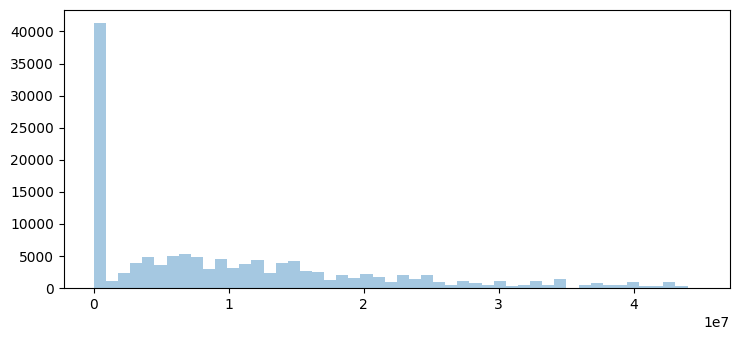

In [143]:
df3=df2[(df2['price']>min_thresold)&(df2['price']<max_thresold)]
sns.distplot(x=df3['price'],kde=False)

<ipython-input-144-1f58c8af6bd8>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: >

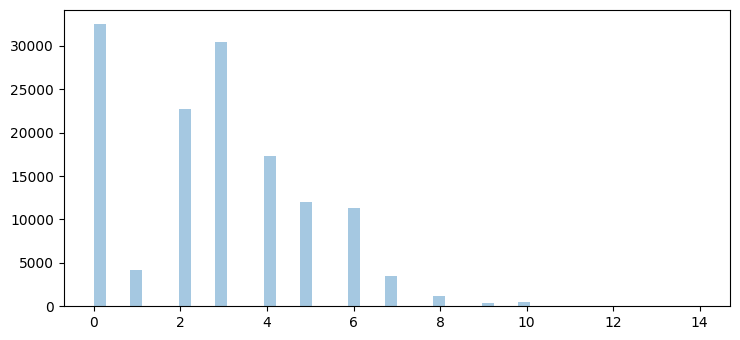

In [144]:
sns.distplot(x=df3['baths'],kde=False)

<ipython-input-145-34c02981fc5a>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: >

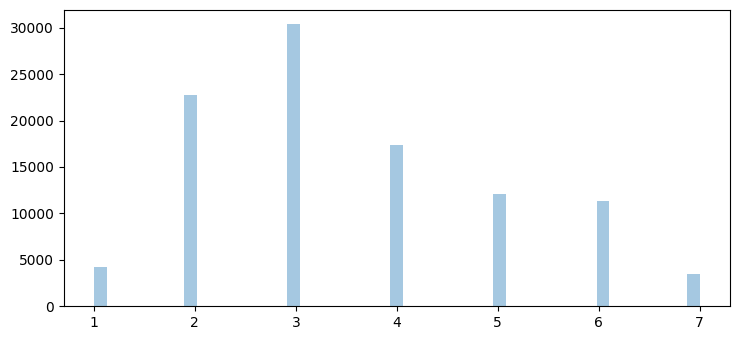

In [145]:
min_thresold=df3['baths'].quantile(0.01)
max_thresold=df3['baths'].quantile(0.99)
min_thresold,max_thresold
df4=df3[(df3['baths']>min_thresold)&(df3['baths']<max_thresold)]
sns.distplot(x=df4['baths'],kde=False)

<ipython-input-146-e25acaefdf32>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='bedrooms'>

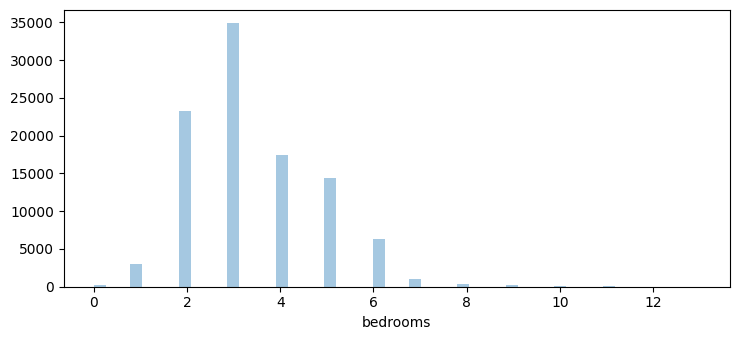

In [146]:
sns.distplot(df4['bedrooms'],kde=False)

<ipython-input-147-39db0e1b6898>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: >

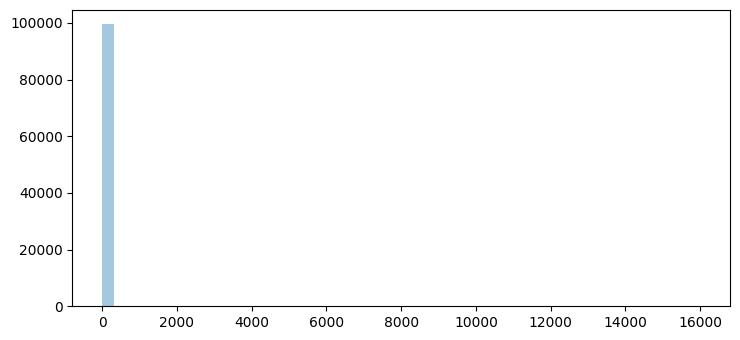

In [147]:
max_thresold=df4['baths'].quantile(0.99)
max_thresold
df5=df4[(df4['bedrooms']<max_thresold)]
sns.distplot(x=df5['Area_in_Marla'],kde=False)


In [148]:
max_thresold=df5['Area_in_Marla'].quantile(0.999)
max_thresold
df5[df5['Area_in_Marla']>max_thresold]


,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area_in_Marla
4923,farmhouse,650000,Chak Shahzad,islamabad,Islamabad Capital,33.658353,73.144054,4,rent,4,06-04-2019,Zorje Pvt Ltd,Obaid Abbasi,Kanal,20,400
10511,farmhouse,650000,Chak Shahzad,islamabad,Islamabad Capital,33.658353,73.144054,4,rent,4,07-04-2019,Self,Self,Kanal,20,400
13306,farmhouse,850000,other,islamabad,Islamabad Capital,33.675997,73.100660,5,rent,5,02-04-2019,Al Kareem Enterprises,Ahmed Hassan,Kanal,20,400
14863,room,18000,G-9,islamabad,Islamabad Capital,33.682675,73.030243,1,rent,1,09-07-2018,Self,Self,Kanal,14,280
15553,house,6800000,other,rawalpindi,Punjab,33.595514,73.116757,4,sale,3,09-07-2018,Self,Self,Kanal,62,1240
21099,farmhouse,600000,Chak Shahzad,islamabad,Islamabad Capital,33.658353,73.144054,5,rent,5,01-05-2019,Mariner Property Services,Capt Muhammad Waqar,Kanal,20,400
21558,upperportion,13500000,Gulistan-e-Jauhar,karachi,Sindh,24.926606,67.130384,3,sale,3,11-19-2018,Self,Self,Kanal,12,240
30276,upperportion,35000,Naval Anchorage,islamabad,Islamabad Capital,33.589638,73.193413,2,rent,2,01-05-2019,Self,Self,Kanal,500,10000
42853,upperportion,65000,Gulshan-e-Iqbal Town,karachi,Sindh,24.917273,67.081357,4,rent,4,03-20-2019,Self,Self,Kanal,12,240
45599,house,24000000,North Karachi,karachi,Sindh,24.972286,67.066300,3,sale,3,03-10-2019,Self,Self,Kanal,14,280


<ipython-input-149-cca86900518e>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: >

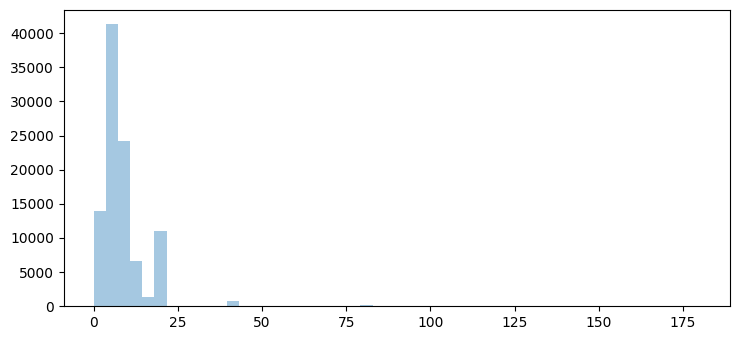

In [149]:
df6=df5[(df5['Area_in_Marla']<max_thresold)]
sns.distplot(x=df6['Area_in_Marla'],kde=False)

Let's drop the unwanted features

In [150]:
df6.drop(['province_name','agent','agency','date_added','longitude','latitude','Area Type','Area Size'], axis=1, inplace=True)
df6.head()

<ipython-input-150-051fa34f30a3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,flat,10000000,G-10,islamabad,2,sale,2,4
1,flat,6900000,E-11,islamabad,3,sale,3,5
2,house,16500000,G-15,islamabad,6,sale,5,8
3,house,43500000,Bani Gala,islamabad,4,sale,4,40
4,house,7000000,DHA Defence,islamabad,3,sale,3,8


Firstly we have to do the one-hot encoding to covert the categorical features into numerical

--------------------------------------------------------------

---------------------------------------------------

In [151]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor

In [160]:
X = df6.drop(['price'], axis='columns')
Y = df6['price']


In [161]:
X

,property_type,location,city,baths,purpose,bedrooms,Area_in_Marla
0,flat,G-10,islamabad,2,sale,2,4
1,flat,E-11,islamabad,3,sale,3,5
2,house,G-15,islamabad,6,sale,5,8
3,house,Bani Gala,islamabad,4,sale,4,40
4,house,DHA Defence,islamabad,3,sale,3,8
...,...,...,...,...,...,...,...
168435,flat,Bahria Town Karachi,karachi,3,sale,3,8
168436,house,Bahria Town Karachi,karachi,4,sale,3,8
168438,house,Bahria Town Karachi,karachi,3,sale,3,8
168439,house,Bahria Town Karachi,karachi,4,sale,4,14


In [162]:
Y

,price
0,10000000
1,6900000
2,16500000
3,43500000
4,7000000
...,...
168435,7500000
168436,8800000
168438,14000000
168439,14000000


In [163]:
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,1,2,4])],remainder='passthrough')
X=ct.fit_transform(X)

In [164]:
X

<99499x683 sparse matrix of type '<class 'numpy.float64'>'
	with 696137 stored elements in Compressed Sparse Row format>

In [165]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Model Building
In which try all the Regression model and will see the results.

In [170]:
#Starting with linear regression
from sklearn.linear_model import LinearRegression
model=LinearRegression()

model.fit(X_train,Y_train)


LinearRegression()

In [171]:
prediction=model.predict(X_test)

In [172]:
linear_model=model.score(X_test,Y_test)
print("Linear Model Score:",linear_model)

Linear Model Score: 0.6952773062448616


Decision Tree

In [174]:
from sklearn import tree
dt_model=tree.DecisionTreeRegressor(criterion='squared_error',max_depth=3,max_leaf_nodes=5)
dt_model.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=3, max_leaf_nodes=5)

In [175]:
dt_score=dt_model.score(X_test,Y_test)
print("Decision Tree model score:",dt_score)

Decision Tree model score: 0.7355321805876771


KNN (k-nearest neighbors)

In [176]:
from sklearn.neighbors import KNeighborsRegressor
knn_model=KNeighborsRegressor(n_neighbors=5,weights='distance')
knn_model.fit(X_train,Y_train)

KNeighborsRegressor(weights='distance')

In [ ]:
knn_score=knn_model.score(X_test,Y_test)
print("KNN score:",knn_score)

In [177]:
knn_prediction=knn_model.predict(X_test)

So from here the best Accuracy Score that we got is from KNN, So we use this model.

In [187]:
import numpy as np

# User input
property_type_input = input("Enter property type (e.g., house, flat, penthouse, farmhouse, lowerportion, upperportion, room): ")
location_input = input("Enter a location: ")
city_input = input("Enter a city: ")
baths = int(input("Enter number of baths: "))
purpose = input("Enter purpose (e.g., sale, rent): ")
bedrooms = int(input("Enter number of bedrooms: "))
Area_in_Marla = float(input("Enter area in Marla: "))

# Create a DataFrame with the input values (structured similarly to your dataset)
input_data = pd.DataFrame({
    'property_type': [property_type_input],
    'location': [location_input],
    'city': [city_input],
    'baths': [baths],
    'purpose': [purpose],
    'bedrooms': [bedrooms],
    'Area_in_Marla': [Area_in_Marla]
})

input_data_transformed = ct.transform(input_data)

# Predict the price using the trained KNN model
predicted_price = knn_model.predict(input_data_transformed)

# Display the predicted price
print(f"Predicted Price: {predicted_price[0]:.2f}")


Enter property type (e.g., house, flat, penthouse, farmhouse, lowerportion, upperportion, room): flat
Enter a location: Gulistan-e-Jauhar
Enter a city: karachi
Enter number of baths: 3
Enter purpose (e.g., sale, rent): rent
Enter number of bedrooms: 3
Enter area in Marla: 1
Predicted Price: 23109.35


In [185]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, knn_prediction)
print('Mean Squared Error:', mse)

# Calculate R-squared (R2)
r2 = r2_score(Y_test, knn_prediction)
print('R-squared:', r2)

# You can also consider other regression metrics like Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test, knn_prediction)
print('Mean Absolute Error:', mae)

Mean Squared Error: 11237802974151.941
R-squared: 0.9018195178913812
Mean Absolute Error: 1794166.817834697
